In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
hsp_df = pd.read_csv('data/hospital_readmissions.csv')
hsp_df.head()

In [ ]:
hsp_df.info()

In [ ]:
hsp_df.rename(columns={'diag_1':'primary_diagnosis','diag_2':'sec_diagnosis',
                       'diag_3':'additional_sec_diag','change':'med_change','A1Ctest':'HbA1ctest'},inplace=True)

hsp_df.head()

In [ ]:

print(hsp_df['age'].unique())

hsp_df['age_cat'] = hsp_df['age'].replace({'[70-80)':'senior-old age',
                                           '[50-60)':'late-middle age','[60-70)':'mid-old age',
                                           '[40-50)':'early-middle age','[80-90)':'very senior-old','[90-100)':'centenarians'})

print('\n')

hsp_df['age_cat'] = hsp_df['age_cat'].astype('category')
print('dtype :',hsp_df['age_cat'].dtype)


hsp_df[['age','age_cat']]

In [ ]:

hsp_df.drop('age', axis=1, inplace=True)


cols_to_convert = ['medical_specialty', 'primary_diagnosis', 'sec_diagnosis', 'additional_sec_diag', 'glucose_test', 'HbA1ctest', 'med_change', 'diabetes_med', 'readmitted']


hsp_df[cols_to_convert] = hsp_df[cols_to_convert].astype('category')

hsp_df.dtypes

In [ ]:

hsp_df.duplicated().sum()

In [ ]:

cols = hsp_df.columns

for c in cols:
    print(c)
    print('\n',hsp_df[c].unique())

In [ ]:

hsp_df.describe()

In [ ]:

hsp_df.describe(exclude=[np.number])

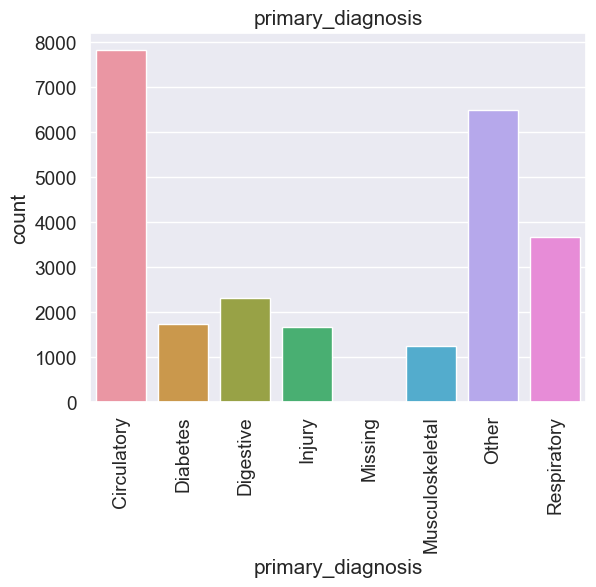

c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


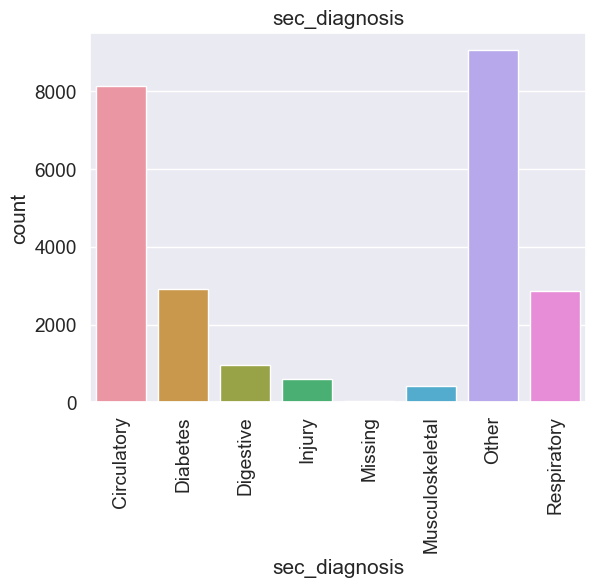

c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


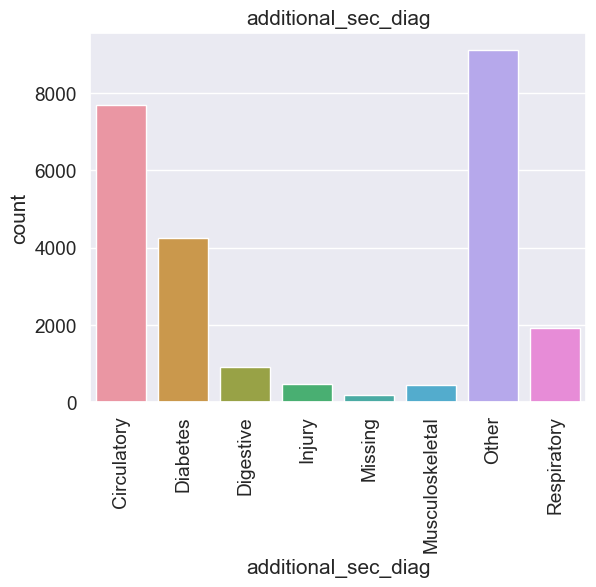

c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


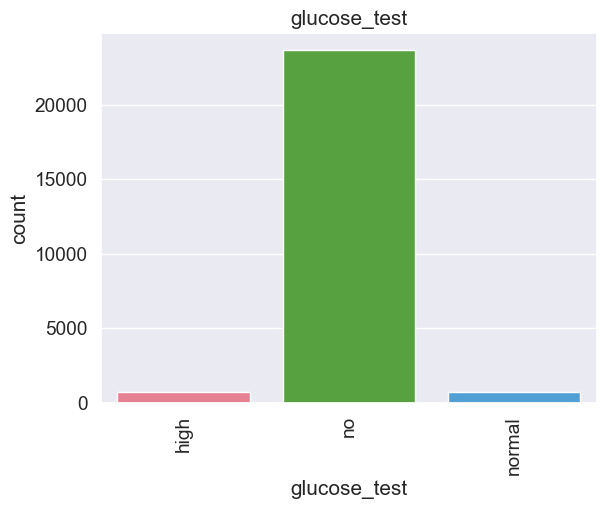

c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


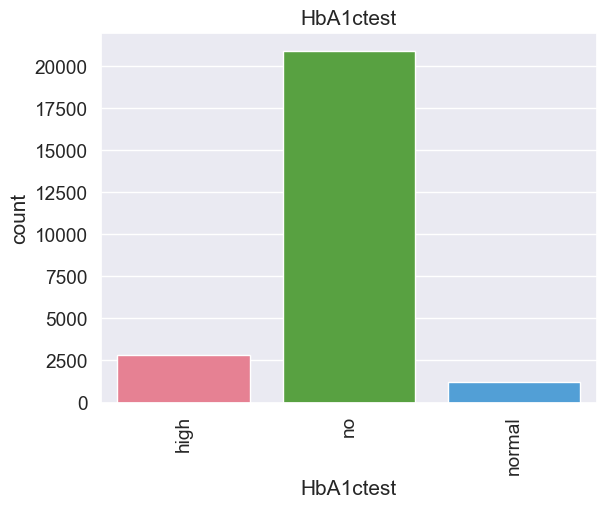

c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


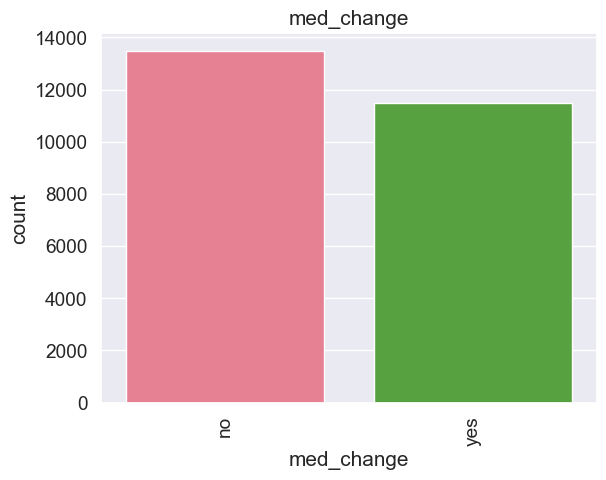

c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


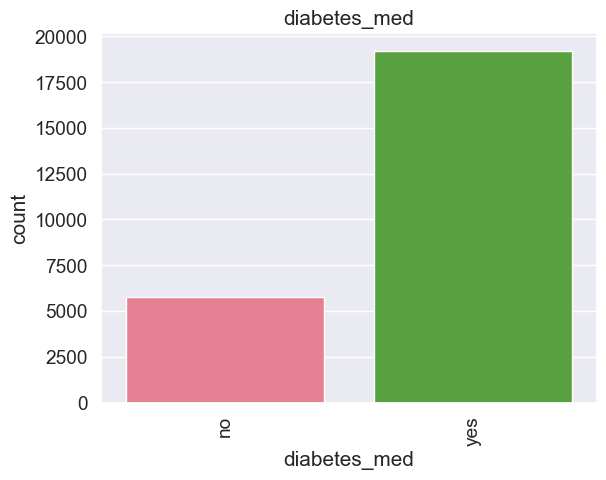

c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


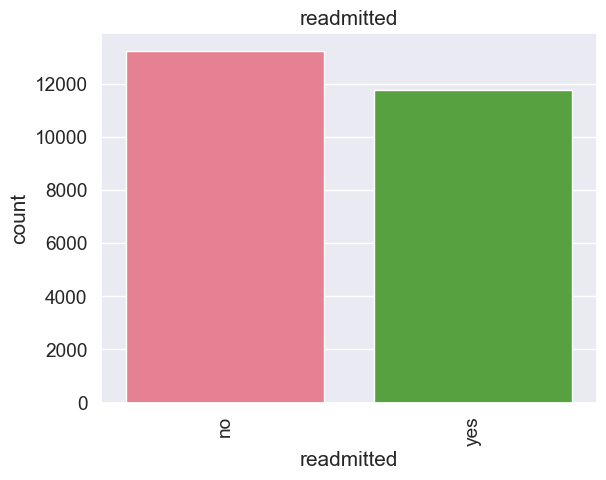

In [137]:


columns = ['age_cat','medical_specialty','primary_diagnosis',
           'sec_diagnosis','additional_sec_diag','glucose_test','HbA1ctest','med_change','diabetes_med','readmitted']

sns.set(style='darkgrid',font_scale=1.25)
sns.set_palette('husl',3)

def plot_cat_count():
    for c in columns:
        sns.countplot(x=c, data=hsp_df)
        plt.title(c)
        plt.xticks(rotation=90)
        plt.show()
        
plot_cat_count()

In [138]:

df = hsp_df.groupby('age_cat')['primary_diagnosis'].value_counts(normalize=True,sort=True).to_frame().unstack()
df

C:\Users\Kannadasan\AppData\Local\Temp\ipykernel_13344\1468950800.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = hsp_df.groupby('age_cat')['primary_diagnosis'].value_counts(normalize=True,sort=True).to_frame().unstack()


proportion                                          \
primary_diagnosis Circulatory  Diabetes Digestive    Injury   Missing   
age_cat                                                                 
centenarians         0.304000  0.045333  0.100000  0.088000  0.000000   
early-middle age     0.199052  0.145735  0.107030  0.063981  0.000000   
late-middle age      0.282120  0.088275  0.099281  0.061321  0.000000   
mid-old age          0.331811  0.065111  0.093692  0.067648  0.000169   
senior-old age       0.349861  0.056311  0.085564  0.064941  0.000146   
very senior-old      0.328167  0.040080  0.089017  0.071081  0.000443   

                                                         
primary_diagnosis Musculoskeletal     Other Respiratory  
age_cat                                                  
centenarians             0.010667  0.293333    0.158667  
early-middle age         0.039494  0.296209    0.148499  
late-middle age          0.051662  0.261456    0.155885  
mid-old age              0.063081  0.237105    0.141383  
senior-old age           0.054556  0.247623    0.140998  
very senior-old          0.037201  0.281001    0.153012

c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence thi

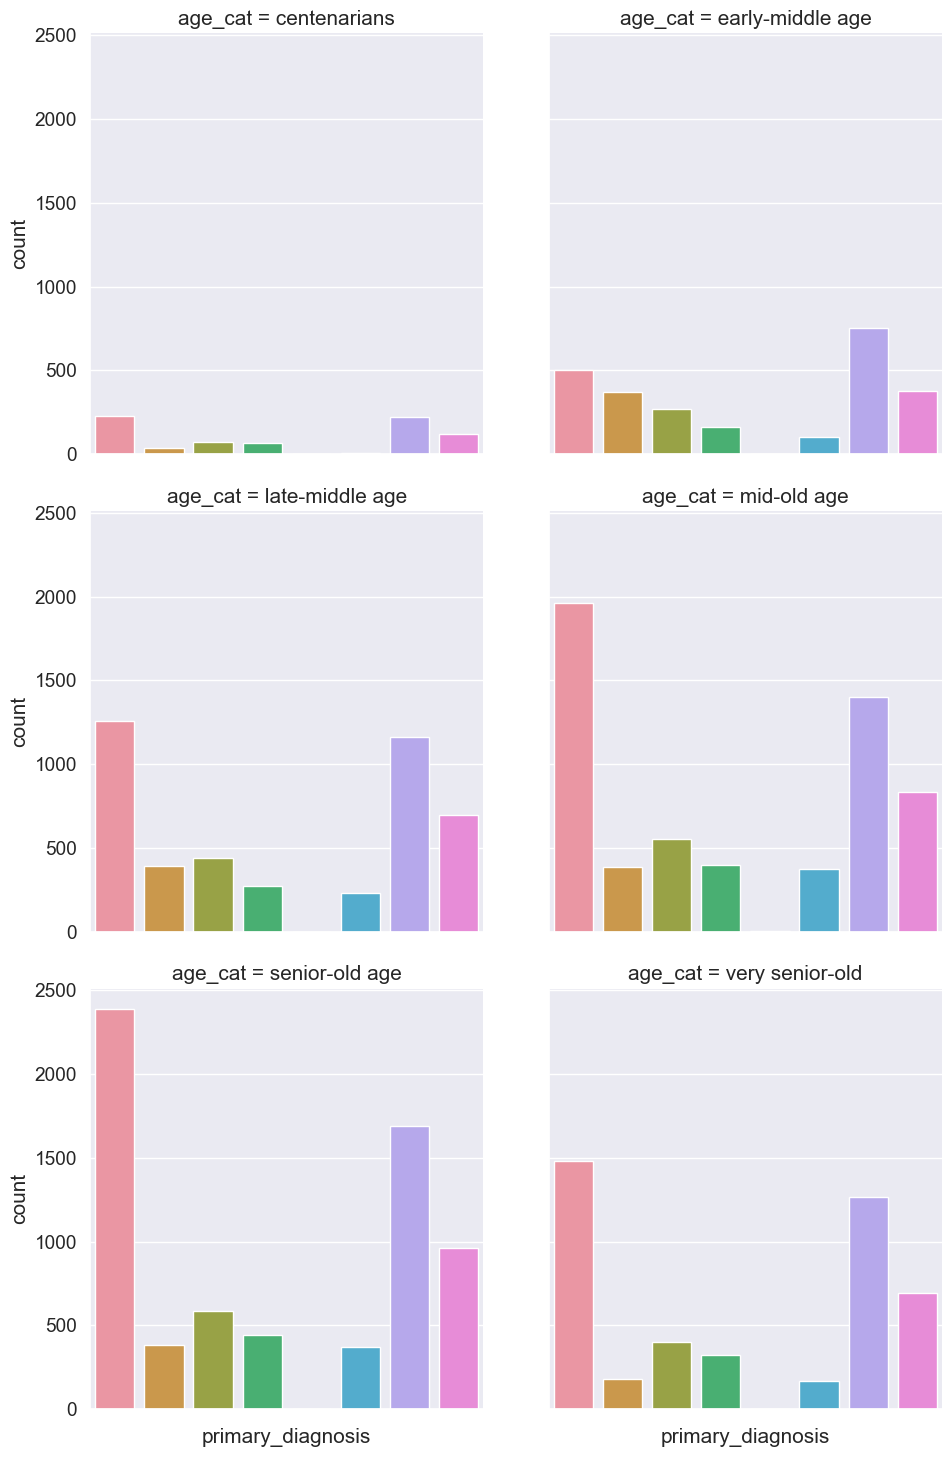

In [139]:

g = sns.catplot(x='primary_diagnosis',col='age_cat', kind='count', data=hsp_df, col_wrap=2)
g.set_xticklabels(rotation=90)
plt.show()

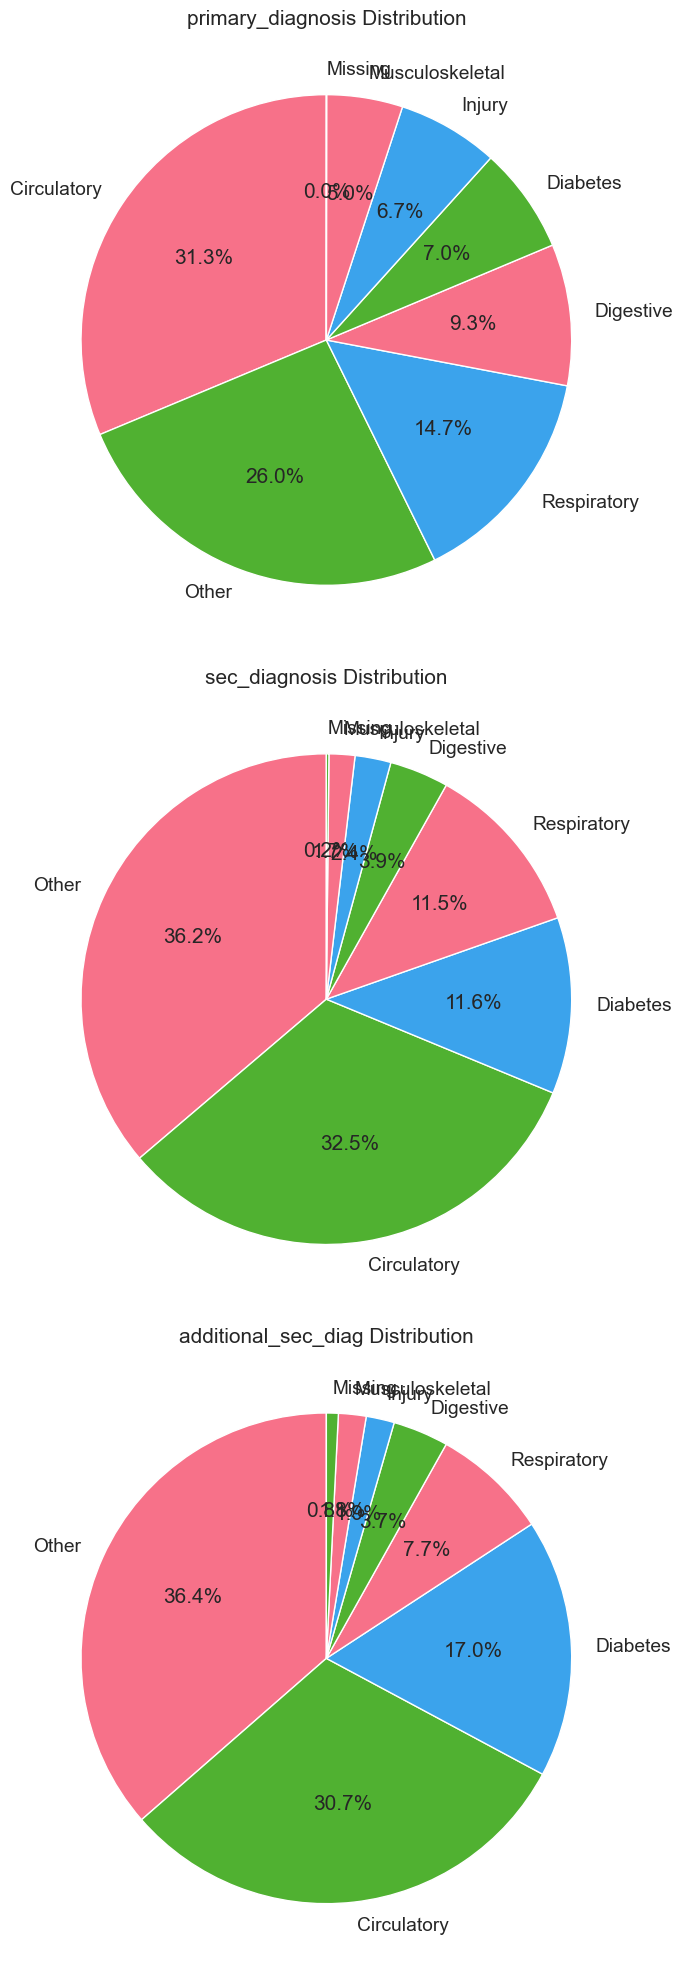

In [140]:


cat_vars = ['primary_diagnosis','sec_diagnosis','additional_sec_diag']

fig,axs = plt.subplots(nrows=3, ncols=1, figsize=(25,20))

for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        cat_counts = hsp_df[var].value_counts()
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
        axs.flat[i].set_title(f'{var} Distribution')
        
fig.tight_layout()
plt.show()

In [141]:
diabetes_pt = hsp_df[(hsp_df['primary_diagnosis'] == 'Diabetes') | (hsp_df['sec_diagnosis'] == 'Diabetes') |
       (hsp_df['additional_sec_diag'] == 'Diabetes')]
diabetes_pt.head()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,primary_diagnosis,sec_diagnosis,additional_sec_diag,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted,age_cat
3,2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes,senior-old age
12,8,67,0,21,0,0,0,Other,Diabetes,Circulatory,Other,no,normal,no,yes,no,senior-old age
14,2,73,1,26,0,0,0,InternalMedicine,Circulatory,Other,Diabetes,no,no,no,yes,no,very senior-old
16,3,52,0,10,0,0,0,Other,Circulatory,Other,Diabetes,no,no,no,yes,yes,senior-old age
18,7,72,0,13,0,0,0,InternalMedicine,Diabetes,Other,Other,no,high,no,yes,yes,early-middle age


In [142]:
non_diabetes_pt = hsp_df[~((hsp_df['primary_diagnosis'] == 'Diabetes') | (hsp_df['sec_diagnosis'] == 'Diabetes') |
       (hsp_df['additional_sec_diag'] == 'Diabetes'))]

print('number of non-DM patient: ',len(non_diabetes_pt.index))

print('number of DM patient: ',len(diabetes_pt.index))

number of non-DM patient:  16212
number of DM patient:  8788


In [143]:

diabetes_pt['readmitted'].value_counts(normalize=True)

readmitted
no     0.534706
yes    0.465294
Name: proportion, dtype: float64

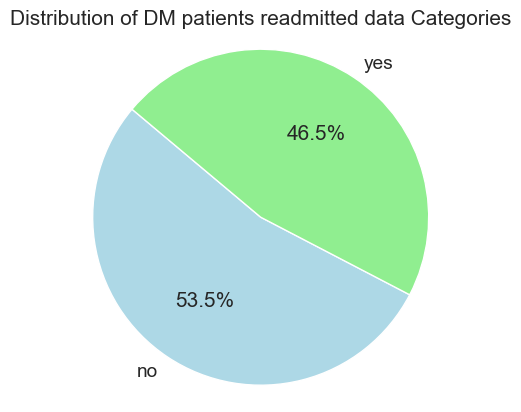

In [144]:
readmitted_data = {
    'no'   :  0.534706,
    'yes'   : 0.465294
}

fig, ax = plt.subplots()

labels = [f"{status}" for status in readmitted_data.keys()]
sizes = list(readmitted_data.values())

colors = ['lightblue', 'lightgreen']

ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

ax.axis('equal')

plt.title('Distribution of DM patients readmitted data Categories')

plt.show()


In [145]:
non_diabetes_pt['readmitted'].value_counts(normalize=True)

readmitted
no     0.527202
yes    0.472798
Name: proportion, dtype: float64

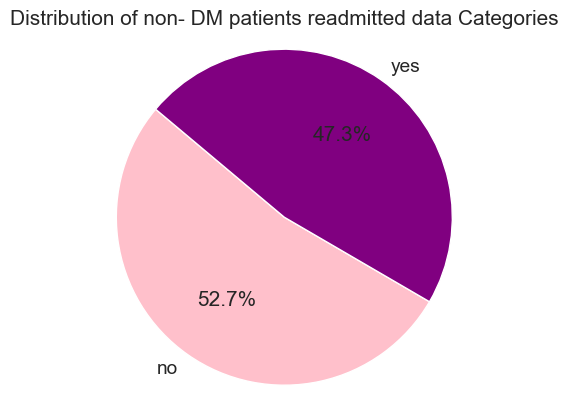

In [146]:
readmitted_data = {
    'no'   :  0.527202,
    'yes'   : 0.472798
}

fig, ax = plt.subplots()

labels = [f"{status}" for status in readmitted_data.keys()]
sizes = list(readmitted_data.values())

colors = ['pink', 'purple']

# Plot the pie chart
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

ax.axis('equal')

# Title for the pie chart
plt.title('Distribution of non- DM patients readmitted data Categories')

# Show the pie chart
plt.show()


In [147]:
#table showing the count of readmitted patient for each diagnosis
pd.set_option('display.max_rows', 64)
hsp_df.groupby(['primary_diagnosis','sec_diagnosis','additional_sec_diag'])['readmitted'].count().to_frame().unstack()

C:\Users\Kannadasan\AppData\Local\Temp\ipykernel_13344\2569994322.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hsp_df.groupby(['primary_diagnosis','sec_diagnosis','additional_sec_diag'])['readmitted'].count().to_frame().unstack()


readmitted                            \
additional_sec_diag               Circulatory Diabetes Digestive Injury   
primary_diagnosis sec_diagnosis                                           
Circulatory       Circulatory            1724      877        48     66   
                  Diabetes                394       28        12      8   
                  Digestive                26        6        10      0   
                  Injury                   70       21         3     14   
                  Missing                   3        0         0      0   
                  Musculoskeletal           9       11         2      1   
                  Other                   595      381        35     18   
                  Respiratory             378      145        16     15   
Diabetes          Circulatory             133       10        13      6   
                  Diabetes                  2        1         2      0   
                  Digestive                13        2        13      2   
                  Injury                    4        0         1      2   
                  Missing                   0        0         0      0   
                  Musculoskeletal          18        0         0      2   
                  Other                   237       25        46     11   
                  Respiratory              35        1         3      1   
Digestive         Circulatory             121       85        39      4   
                  Diabetes                 99        3        38      1   
                  Digestive                60       92        81      3   
                  Injury                    8        3         7      1   
                  Missing                   0        1         0      0   
                  Musculoskeletal           3        4         2      0   
                  Other                   206      174       129     13   
                  Respiratory              56       26        21      2   
Injury            Circulatory             118       74         1     16   
                  Diabetes                 62        5         2      6   
                  Digestive                10       10         6      2   
                  Injury                   36       17         2     27   
                  Missing                   0        5         0      0   
                  Musculoskeletal           6        8         1      2   
                  Other                   172      133        13     51   
                  Respiratory              23        7         2      8   
Missing           Circulatory               0        0         0      0   
                  Diabetes                  1        0         0      0   
                  Digestive                 0        0         0      0   
                  Injury                    0        0         0      0   
                  Missing                   0        0         0      0   
                  Musculoskeletal           0        0         0      0   
                  Other                     0        1         0      0   
                  Respiratory               0        0         0      0   
Musculoskeletal   Circulatory              71      128         5      6   
                  Diabetes                122        5         2      1   
                  Digestive                 7        4         3      2   
                  Injury                    4        5         5      2   
                  Missing                   0        0         0      0   
                  Musculoskeletal          22       48         0      4   
                  Other                    95      110         7     13   
                  Respiratory              28       20         0      4   
Other             Circulatory             347      280        34     16   
                  Diabetes                288       17        30     15   
                  Digestive                50       54      

After exploring the data I could deduct that about 8788  patients had Diabetes as either a primary diagnosis, secondary diagnosis or additional secondary diagnosis. This made up about one-third of the patients population.Amongst the DM patient approximately 47 percent were readmitted while 53 percent where not.
While about 16212 patients did not have DM as either a primary diagnosis, secondary diagnosis or additional secondary diagnosis.This makes about two-third of the patients population.Amongst the non-DM patients approximately 47 percent were readmitted while 53 percent were not. From the analysis we cannot really say if diabetes plays a central role in readmission as they could be other factors causing patients readmission but we can deduct that majority of the patients had diabetes as a diagnosis logically making them occupy a high readmission rates


## what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?

In [148]:
#viewing the dataset
hsp_df.head()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,primary_diagnosis,sec_diagnosis,additional_sec_diag,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted,age_cat
0,8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no,senior-old age
1,3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no,senior-old age
2,5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes,late-middle age
3,2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes,senior-old age
4,1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no,mid-old age


c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


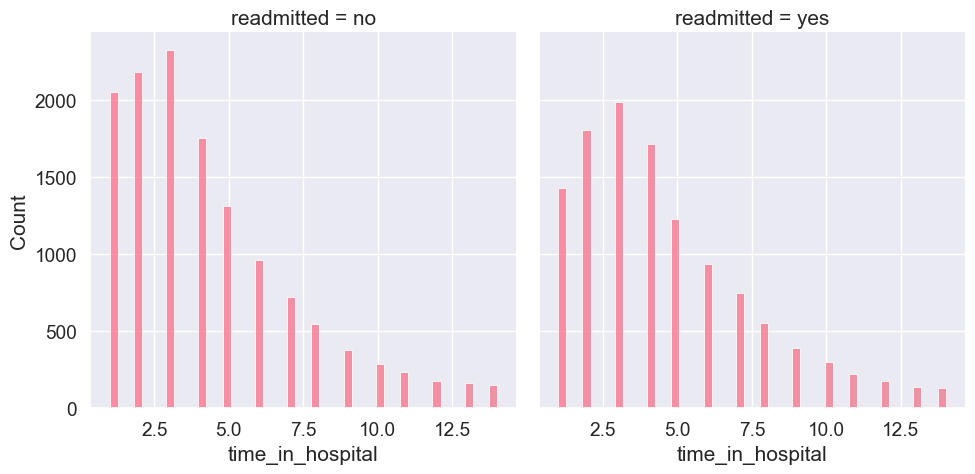

c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


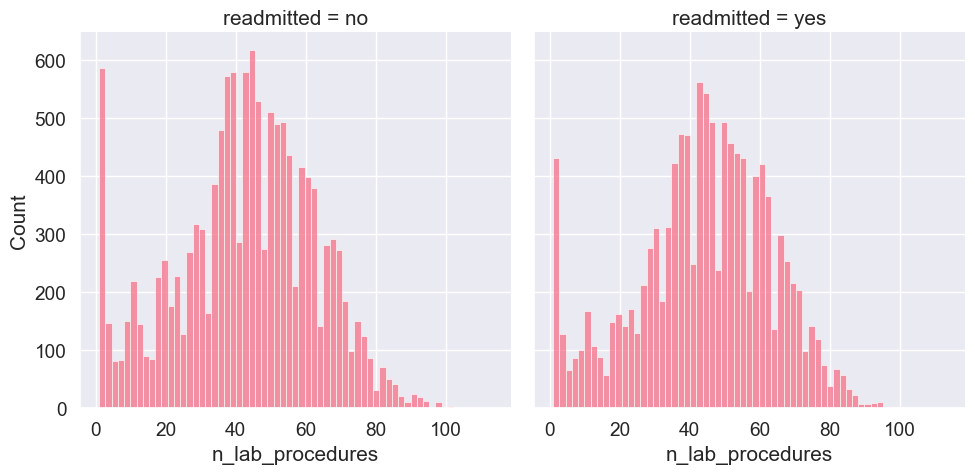

c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


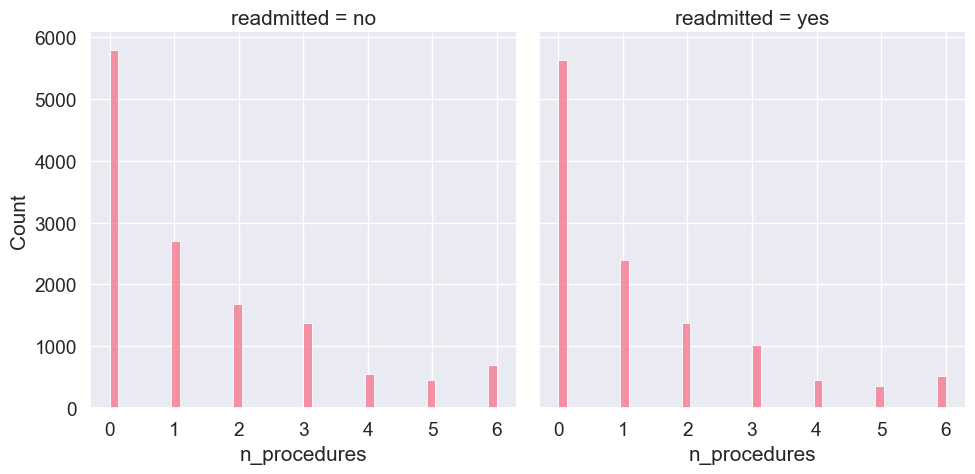

c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


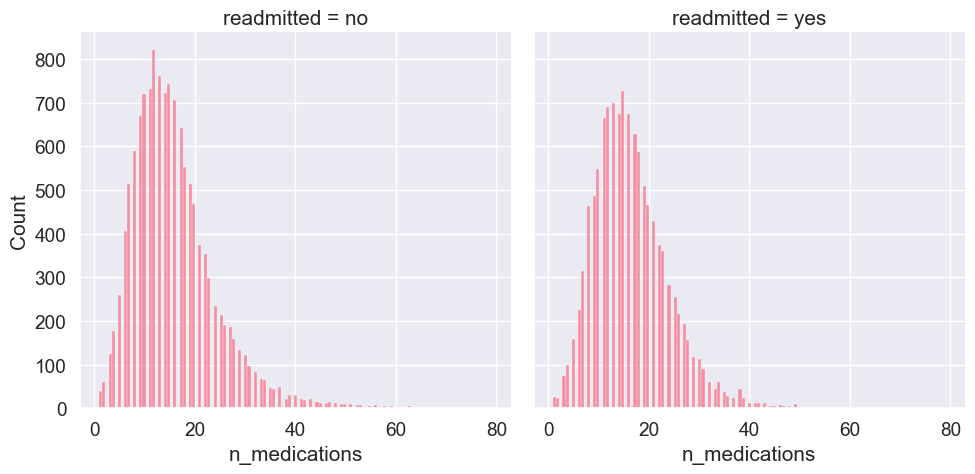

c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


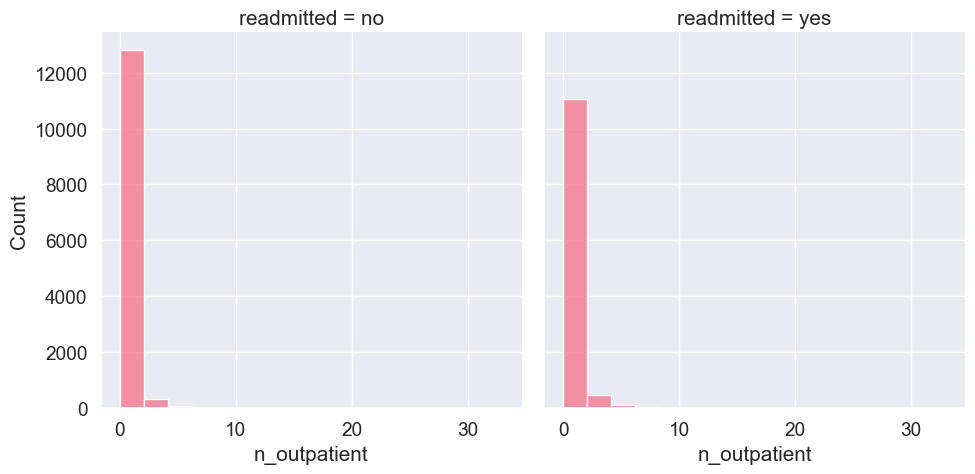

c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


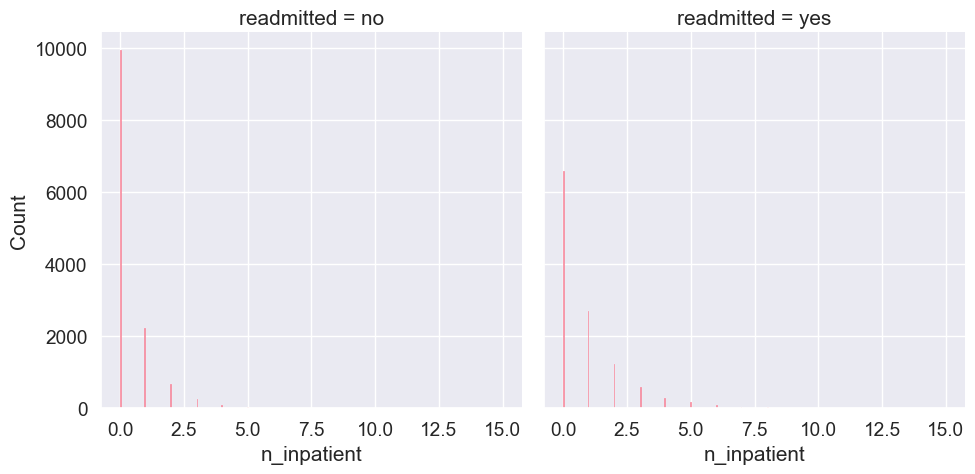

c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


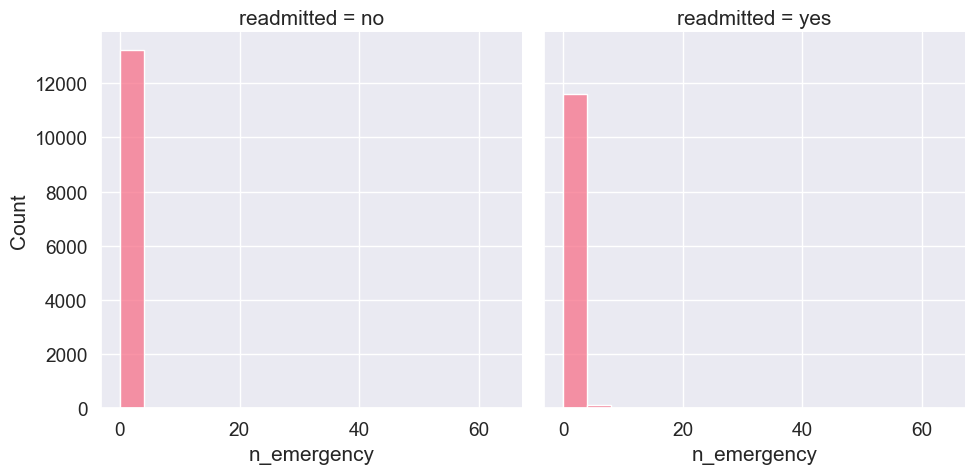

In [149]:
#plotting a grap showing the distribution of numerical columns by their readmitted status
columns = ['time_in_hospital','n_lab_procedures','n_procedures','n_medications','n_outpatient','n_inpatient','n_emergency']

sns.set(style='darkgrid',font_scale=1.25)
sns.set_palette('husl',3)

def plot_cat_count():
    for c in columns:
        sns.displot(x=c, data=hsp_df, col='readmitted',col_wrap=2)
        #plt.title(c)
        #plt.xticks(rotation=90)
        plt.show()
        
plot_cat_count()

c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


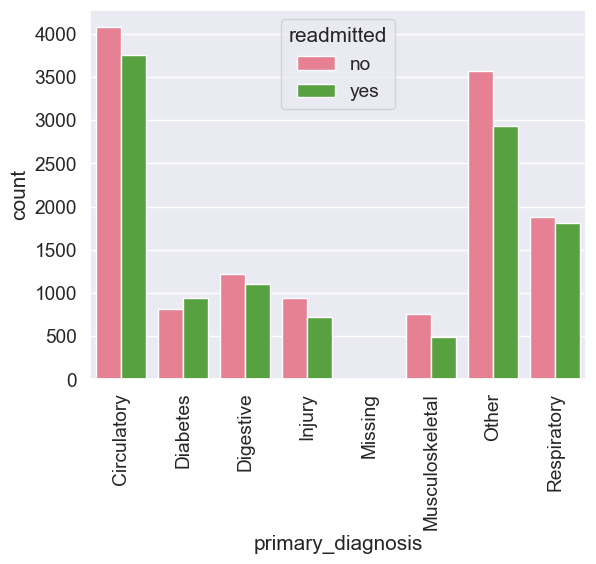

c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


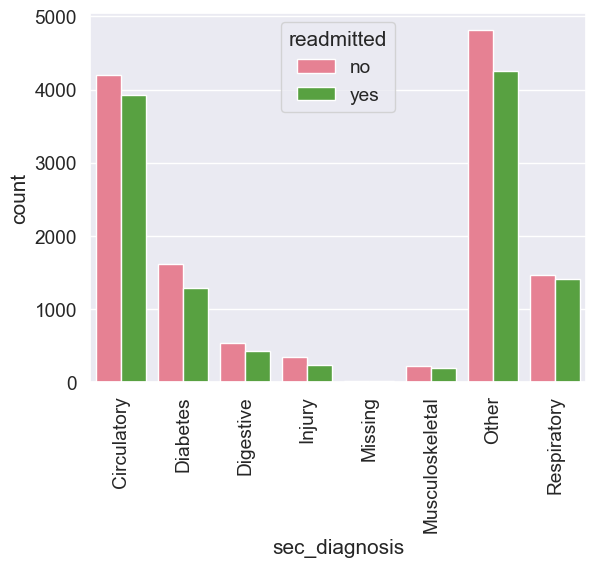

c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


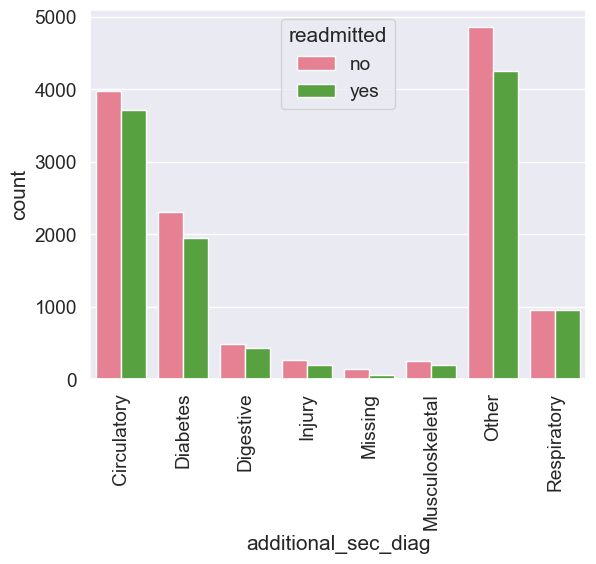

c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


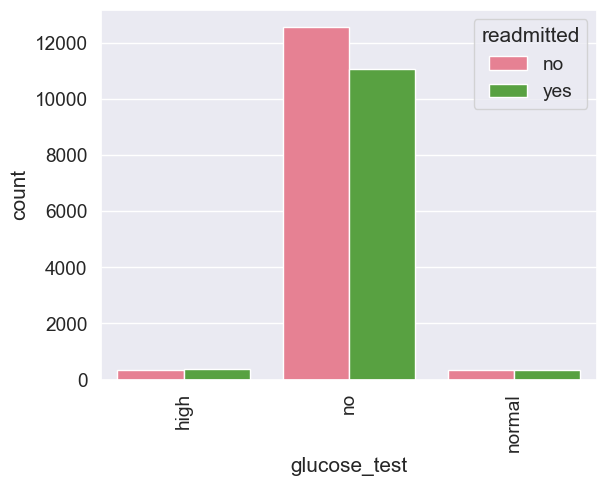

c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


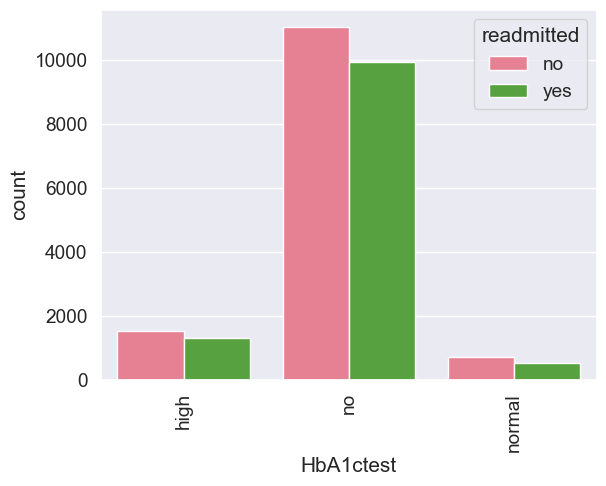

c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


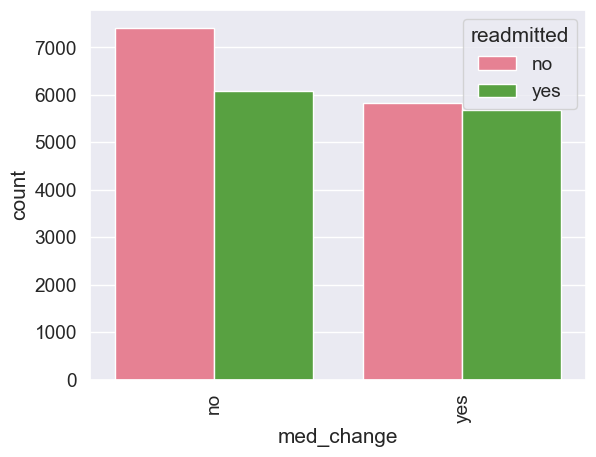

c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


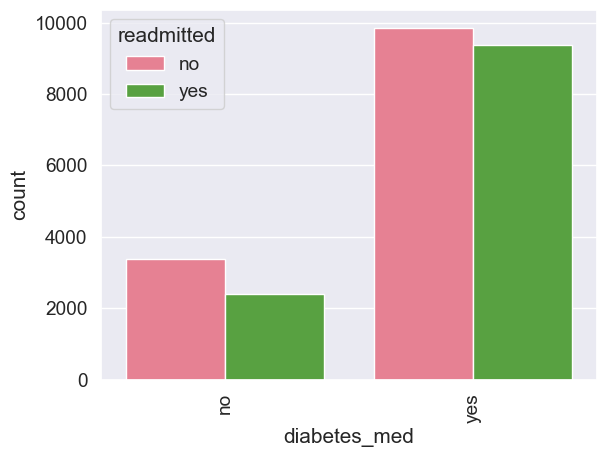

c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


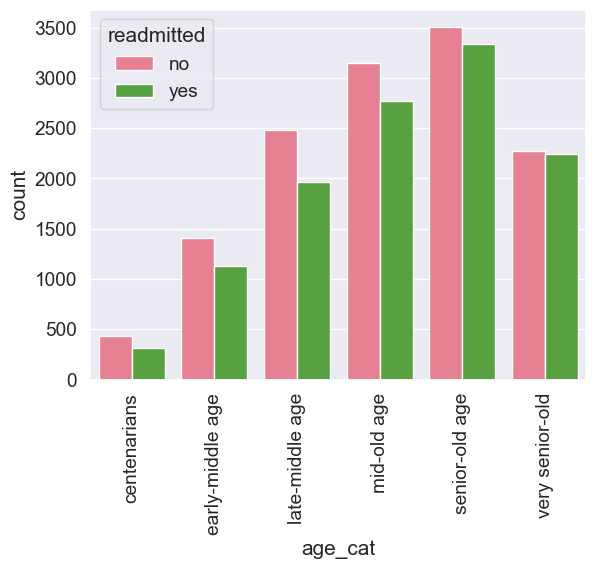

In [150]:
columns = ['primary_diagnosis','sec_diagnosis','additional_sec_diag',
           'glucose_test','HbA1ctest','med_change','diabetes_med','age_cat']

def count_plot():
    for c in columns:
        sns.countplot(x=c, hue='readmitted', data=hsp_df)
        plt.xticks(rotation=90)
        plt.show()
        
count_plot()

In [151]:
hsp_df['age_cat'] = hsp_df['age_cat'].replace({'senior-old age':7,
                                           'late-middle age':5,'mid-old age':6,
                                           'early-middle age':4,'very senior-old':8,'centenarians':9})


In [152]:
hsp_df.head(10)

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,primary_diagnosis,sec_diagnosis,additional_sec_diag,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted,age_cat
0,8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no,7
1,3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no,7
2,5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes,5
3,2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes,7
4,1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no,6
5,2,51,0,10,0,0,0,Missing,Other,Other,Other,no,no,no,no,yes,4
6,4,44,2,21,0,0,0,Missing,Injury,Other,Other,no,normal,yes,yes,no,5
7,1,19,6,16,0,0,1,Other,Circulatory,Other,Other,no,no,no,yes,yes,6
8,4,67,3,13,0,0,0,InternalMedicine,Digestive,Other,Other,no,no,no,no,yes,8
9,8,37,1,18,0,0,0,Family/GeneralPractice,Respiratory,Respiratory,Other,no,no,yes,yes,no,7


In [153]:
threshold = 0.02  

# Calculate frequency of each category
freq = hsp_df["medical_specialty"].value_counts(normalize=True)

# Categories to keep
common_cats = freq[freq >= threshold].index

# Replace rare categories with "Other"
hsp_df["medical_specialty"] = hsp_df["medical_specialty"].apply(lambda x: x if x in common_cats else "Other")

In [154]:
diag_cols = ["primary_diagnosis", "sec_diagnosis", "additional_sec_diag"]


categories = pd.unique(hsp_df[diag_cols].values.ravel())

one_hot = pd.DataFrame(0, index=hsp_df.index, columns=categories)

for col in diag_cols:
    one_hot = one_hot | pd.get_dummies(hsp_df[col]).reindex(columns=categories, fill_value=0)

one_hot = one_hot.astype(int)

hsp_df_dropped = hsp_df.drop(columns=diag_cols)

insert_at = 8

left = hsp_df_dropped.iloc[:, :insert_at]
right = hsp_df_dropped.iloc[:, insert_at:]


hsp_df_final = pd.concat([left, one_hot, right], axis=1)


print(hsp_df_final.head())

   time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
0                 8                72             1             18   
1                 3                34             2             13   
2                 5                45             0             18   
3                 2                36             0             12   
4                 1                42             0              7   

   n_outpatient  n_inpatient  n_emergency medical_specialty  Circulatory  \
0             2            0            0           Missing            1   
1             0            0            0             Other            0   
2             0            0            0           Missing            1   
3             1            0            0           Missing            1   
4             0            0            0  InternalMedicine            1   

   Respiratory  ...  Injury  Digestive  Musculoskeletal  Missing  \
0            1  ...       0          0                

In [155]:
hsp_df=hsp_df_final

In [156]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

categorical_cols = hsp_df.select_dtypes(include=['category']).columns
print("Categorical Columns:", categorical_cols)

for col in categorical_cols[:-1]:
    le = LabelEncoder()
    hsp_df[col] = le.fit_transform(hsp_df[col].astype(str))  

hsp_df.head()


Categorical Columns: Index(['medical_specialty', 'glucose_test', 'HbA1ctest', 'med_change',
       'diabetes_med', 'readmitted', 'age_cat'],
      dtype='object')


,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,Circulatory,Respiratory,...,Injury,Digestive,Musculoskeletal,Missing,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted,age_cat
0,8,72,1,18,2,0,0,4,1,1,...,0,0,0,0,1,1,0,1,0,7
1,3,34,2,13,0,0,0,5,0,0,...,0,0,0,0,1,1,0,1,0,7
2,5,45,0,18,0,0,0,4,1,0,...,0,0,0,0,1,1,1,1,1,5
3,2,36,0,12,1,0,0,4,1,0,...,0,0,0,0,1,1,1,1,1,7
4,1,42,0,7,0,0,0,3,1,1,...,0,0,0,0,1,1,0,1,0,6


In [157]:
hsp_df.drop('Missing', axis=1, inplace=True)

In [158]:
hsp_df.head()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,Circulatory,Respiratory,...,Diabetes,Injury,Digestive,Musculoskeletal,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted,age_cat
0,8,72,1,18,2,0,0,4,1,1,...,0,0,0,0,1,1,0,1,0,7
1,3,34,2,13,0,0,0,5,0,0,...,0,0,0,0,1,1,0,1,0,7
2,5,45,0,18,0,0,0,4,1,0,...,0,0,0,0,1,1,1,1,1,5
3,2,36,0,12,1,0,0,4,1,0,...,1,0,0,0,1,1,1,1,1,7
4,1,42,0,7,0,0,0,3,1,1,...,0,0,0,0,1,1,0,1,0,6


In [159]:
hsp_df["total_visits"] = hsp_df["n_outpatient"] + hsp_df["n_inpatient"] + hsp_df["n_emergency"]

hsp_df["high_risk"] = np.where((hsp_df["HbA1ctest"] == "High") | (hsp_df["glucose_test"] == "High"), 1, 0)

In [160]:
def severity(days):
    if days <= 3:
        return "low"
    elif days <= 7:
        return "medium"
    else:
        return "high"

hsp_df["severity"] = hsp_df["time_in_hospital"].apply(severity)

In [161]:
hsp_df['severity'] = hsp_df['severity'].replace({'low':0,'medium':1,'high':2})
                                          

In [162]:
hsp_df.head()


,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,Circulatory,Respiratory,...,Musculoskeletal,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted,age_cat,total_visits,high_risk,severity
0,8,72,1,18,2,0,0,4,1,1,...,0,1,1,0,1,0,7,2,0,2
1,3,34,2,13,0,0,0,5,0,0,...,0,1,1,0,1,0,7,0,0,0
2,5,45,0,18,0,0,0,4,1,0,...,0,1,1,1,1,1,5,0,0,1
3,2,36,0,12,1,0,0,4,1,0,...,0,1,1,1,1,1,7,1,0,0
4,1,42,0,7,0,0,0,3,1,1,...,0,1,1,0,1,0,6,0,0,0


c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


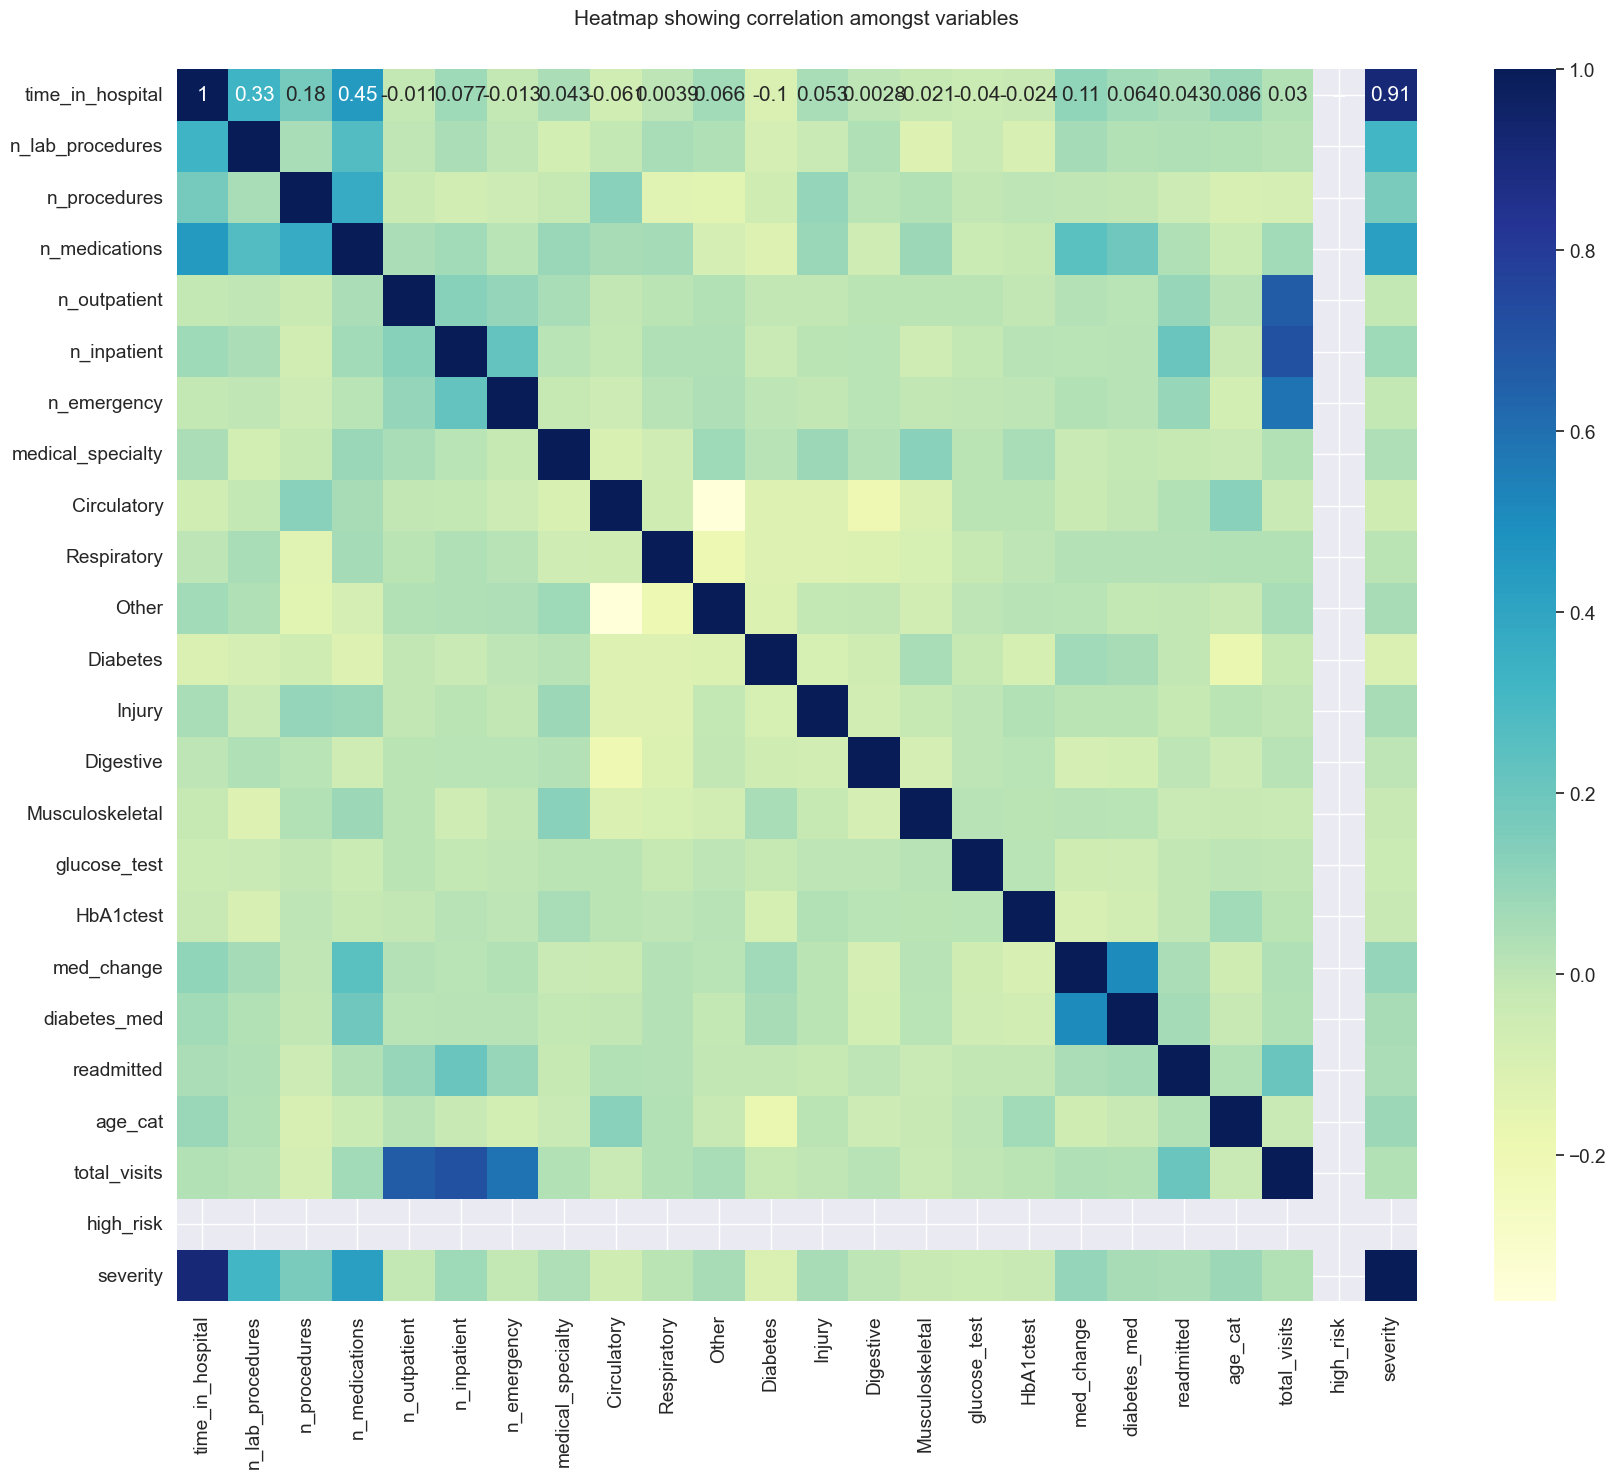

In [163]:
plt.figure(figsize=(20,16))
sns.heatmap(hsp_df.corr(), cmap='YlGnBu', fmt='.2g', annot=True)

plt.title('Heatmap showing correlation amongst variables',y=1.03)
plt.show()

In [170]:
X = hsp_df.drop(columns=["readmitted"])   # all other columns as features
y = hsp_df["readmitted"]

print('X shape:', X.shape)
#print('X_features:',X_features.shape)
print('y shape:', y.shape)


X shape: (25000, 23)
y shape: (25000,)


In [171]:
hsp_df['readmitted'].value_counts()

readmitted
0    13246
1    11754
Name: count, dtype: int64

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score , recall_score, accuracy_score,classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)



In [179]:
names = X_features.columns

### DECISION TREE CLASSIFIER

In [180]:
dtc = DecisionTreeClassifier(random_state=2, max_depth=3, min_samples_leaf=0.20)

dtc.fit(X_train, y_train)

test_predictions = dtc.predict(X_test)
train_prediction = dtc.predict(X_train)

acc_scoreX = accuracy_score(y_train, train_prediction)
print('Training_accuracy_score :', acc_scoreX)
acc_score = accuracy_score(y_test, test_predictions)
print('Testing_accuracy_score :', acc_score)
pre_score = precision_score(y_test, test_predictions)
print('precision_score :', pre_score)
rec_score = recall_score(y_test, test_predictions)
print('recall_score :',rec_score)

Training_accuracy_score : 0.6069
Testing_accuracy_score : 0.6078
precision_score : 0.5865128660159716
recall_score : 0.5623139089749043


In [181]:

importance = dtc.feature_importances_

imp_df = pd.DataFrame({'feature_name':names, 'Importance':importance})
fi = imp_df.sort_values(by='Importance', ascending=False).head()

plt.figure(figsize=(8,6))
sns.barplot(data=fi, x= 'Importance', y='feature_name')
plt.xlabel('Importance', fontsize=16)
plt.ylabel('feature_name', fontsize=16)
plt.title('Bar Chart of Decision Tree Classifier coefficients as Feature Importance Scores')
plt.show()

ValueError: All arrays must be of the same length

In [186]:
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight="balanced",   # handles imbalance
    random_state=42
)

### RANDOM FOREST CLASSIFIER

In [183]:
model.fit(X_train, y_train)

# -------------------------
# Step 4: Predictions & Evaluation
# -------------------------
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]  # probability for ROC-AUC

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nROC AUC Score:", roc_auc_score(y_test, y_proba))


Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.69      0.65      2649
           1       0.59      0.50      0.54      2351

    accuracy                           0.60      5000
   macro avg       0.60      0.60      0.59      5000
weighted avg       0.60      0.60      0.60      5000


Confusion Matrix:
[[1821  828]
 [1169 1182]]

ROC AUC Score: 0.6337622649671255


In [184]:
rfc = RandomForestClassifier(random_state=23,n_estimators=100,max_depth=6)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, random_state=23)

In [185]:
test_predictions = rfc.predict(X_test)
train_prediction = rfc.predict(X_train)

acc_scoreX = accuracy_score(y_train, train_prediction)
print('Training_accuracy_score :', acc_scoreX)
acc_score = accuracy_score(y_test, test_predictions)
print('Testing_accuracy_score :', acc_score)
pre_score = precision_score(y_test, test_predictions)
print('precision_score :', pre_score)
rec_score = recall_score(y_test, test_predictions)
print('recall_score :',rec_score)

Training_accuracy_score : 0.62415
Testing_accuracy_score : 0.6164
precision_score : 0.608304152076038
recall_score : 0.5172267120374309


In [ ]:

importance = rfc.feature_importances_

imp_df = pd.DataFrame({'feature_name':names, 'Importance':importance})
fi = imp_df.sort_values(by='Importance', ascending=False).head()


plt.figure(figsize=(8,6))
sns.barplot(data=fi, x= 'Importance', y='feature_name')
plt.xlabel('Importance', fontsize=16)
plt.ylabel('feature_name', fontsize=16)
plt.title('Bar Chart of Random Forest classifier Feature Importance Scores')
plt.show()

## TUNING RANDOM FOREST HYPER-PARAMETERS

In [ ]:

print(rfc.get_params())

In [ ]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=23)

params_rfc = {'max_depth':[3,6,8], 'min_samples_leaf':[0.04, 0.08, 1], 'max_features':['auto','sqrt','log2']}

grid_rfc = GridSearchCV(estimator=rfc , param_grid= params_rfc, scoring='accuracy', cv=10, n_jobs=-1)
grid_rfc.fit(X_train, y_train)


best_hyperparams = grid_rfc.best_params_
print("best_hyperparams: ", best_hyperparams)


best_cv_score = grid_rfc.best_score_
print("best_cv_score: ", best_cv_score)

best_model = grid_rfc.best_estimator_
print("best_model: ", best_model)


test_acc = best_model.score(X_test, y_test)
print("test_acc: ",test_acc)

In [ ]:

rfc2 = RandomForestClassifier(random_state=23,max_depth=8, max_features= 'log2',min_samples_leaf=1)

rfc2.fit(X_train, y_train)

test_predictions = rfc2.predict(X_test)
train_prediction = rfc2.predict(X_train)

acc_scoreX = accuracy_score(y_train, train_prediction)
print('Training_accuracy_score :', acc_scoreX)
acc_score = accuracy_score(y_test, test_predictions)
print('Testing_accuracy_score :', acc_score)
pre_score = precision_score(y_test, test_predictions)
print('precision_score :', pre_score)
rec_score = recall_score(y_test, test_predictions)
print('recall_score :',rec_score)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm, linewidth=.5, annot=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix of Tunned RandomForestClassifier')
plt.show()

In [ ]:

importance = rfc2.feature_importances_

imp_df = pd.DataFrame({'feature_name':names, 'Importance':importance})
fi = imp_df.sort_values(by='Importance', ascending=False).head()

plt.figure(figsize=(8,6))
sns.barplot(data=fi, x= 'Importance', y='feature_name')
plt.xlabel('Importance', fontsize=16)
plt.ylabel('feature_name', fontsize=16)
plt.title('Bar Chart of Random Forest classifier Feature Importance Scores')
plt.show()